# Logical Computations with Neurons

Let there exist 3 neurons A,B,C

1. C = A: Neuron C gets activated when neuron A is active. This is essentially the identity.

2. C = A $\wedge$ B: Neuron C gets activated when both A and B are active.

3. C = A $\vee$ B: Neuron C gets activated when A or B are active or both.

4. C = A $\wedge$ $\neg$B: Neuron C gets activated if neuron A is active and if neuron B is off.

Although each network is simple if they combined together in layers they can perform complex logical computations.

# The Perceptron

The Perceptron is one of the simplest artificial neural networks. It is based on a threshold logic unit (TLU) artificial neuron. The TLU computes a weighted sum of its inputs $z = w_1x_1 + w_2x_2 + \cdots + w_nx_n = \bf{x}^Tw$, it then applies a step function to the sum and outputs the result $h_w(\bf{x})$ $= step(z)$.

Common step functions are the heaviside step function and the sign function.


heaviside (z) $= \begin{cases}                
                    0:  z < 0 \\
                    1: z \geq 0            
                   \end{cases}$

sgn(z) $= \begin{cases} 
             -1:  z < 0 \\ \\
              0: z = 0  \\ \\
              +1: z > 0
           \end{cases}$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the input features for each instance and if this combination exceeds a threshold, it outputs the positive class or else the negative class. For example we could classify an iris flower based on the petal length and petal width. We would also need to add an extra bias feature like before. In the training phase we need to compute the weights and bias.

A Perceptron is composed of a single layer of TLUs. When all the neurons in a layer are connected to every layer in the previous layer (in this case the input layer) it is called a dense layer. The input layer is formed by the input neurons and a bias neuron which always outputs 1. The outputs of a layer of artificial neurons can be computed via


$\Large h_{\bf{W},\bf{b}}(\bf{X}) = \phi(\bf{X}\bf{W} + \bf{b})$


$\bf{X}$ - The matrix of input features where rows represent each instance and columns represent the features.

$\bf{W}$ - The weight matrix has one row per input neuron and one column per artificial neuron in the layer. For classification this is an n x k matrix.

$\bf{b}$ - The bias vector contains one column per artificial neuron. This a row vector 1 x k.

$\phi$ - This is the activation function which in this case is a step function.


### Perceptron Update Rule

$w_{i, j} = w_{i, j} + \eta (y_i - \hat{y}_j)x_i$

# Perception From Scratch

In [120]:
import numpy as np

In [121]:
from sklearn.datasets import load_iris

In [122]:
import numpy as np

class Perceptronclassifier:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))
        
        for i in range(self.epochs):
            for idx, x_i in enumerate(X):
                z = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.softmax(z)

                y_onehot = np.zeros((1, n_classes))
                y_onehot[0, y[idx]] = 1
                
                update = self.learning_rate * np.outer(x_i, (y_onehot - y_predicted))
                self.weights += update
                self.bias += self.learning_rate * (y_onehot - y_predicted)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(z)
        return np.argmax(y_predicted, axis=1)

In [123]:
iris = load_iris().data
target = load_iris().target

In [124]:
X = iris[:,2:]
y = target

In [125]:
per_clf = Perceptronclassifier()

In [126]:
per_clf.fit(X, y)

In [127]:
per_clf.predict([[5.7, 2.1]])

array([2], dtype=int64)

# Perceptron Class Scikit-Learn

In [128]:
from sklearn.linear_model import Perceptron

In [129]:
percep = Perceptron()
percep.fit(X, y)

Perceptron()

In [130]:
percep.predict([[1.5, 0.1]])

array([0])

# Multi-Layer Perceptron & Backpropagation

A Multi-Layer Perceptron (MLP) is composed of one input layer, one or more layers of TLUs called hidden layers, and a output layer. An Artificial Neural Network containing more than 2 hidden layers is called a deep neural network.

## Backpropagation

### Forward Pass

1. Data is fed into the input layer.
2. Data passes through the network layer by layer and at each layer the weighted sum of inputs is calculated and an activation function is applied. This prediction serves as the input for the next layer
3. The final output is calculated after the algorithm traverses all the layers.

### Backward Pass

1. calculate the error at output layer using a loss function.
2. calculate the gradient of the loss function with respect to each weight and bias.
3. Use the chain rule to propagate errors backward through the network.
4. Use gradient descent to update the weights and biases.

### Forward Pass Example

Let's Consider a network with 1 input layer, 1 hidden layer and 1 output layer

Input layer - 2 neurons (2 features) $\newline$
Hidden layer - 2 neurons $\newline$
Output layer - 1 neuron $\newline$


$x = \begin{pmatrix}
            x_1 & x_2 
      \end{pmatrix}  
      = \begin{pmatrix}
            0.5 & 0.8 
         \end{pmatrix} $
         
The input to hidden weight matrix is

$ W^1 = \begin{pmatrix}
            0.2 & 0.4 \\
            0.5 & 0.1
      \end{pmatrix} $
      
The bias vector for the hidden layer is

$ b^1 = \begin{pmatrix}
            0.1 \\
            0.2
      \end{pmatrix} $

      
The hidden to output layer weight matrix is

$ W^2 = \begin{pmatrix}
            0.6 \\
            0.7
      \end{pmatrix} $

The bias vector for the output layer is

$ b^2 = \begin{pmatrix}
            0.1
      \end{pmatrix} $


$z^1 = x^T\cdot W^1 + b^1 = \begin{pmatrix}
            0.42 \\
            0.33
      \end{pmatrix} + \begin{pmatrix}
            0.1 \\
            0.2
      \end{pmatrix} = \begin{pmatrix}
            0.52 \\
            0.53
      \end{pmatrix} $

$a^1 = ReLU(z^1) = \begin{pmatrix}
            max(0, 0.52) \\
            max(0, 0.53)
      \end{pmatrix} = \begin{pmatrix}
            0.52 \\
            0.53
      \end{pmatrix} $ 
      
$z^2 = (a^1)^T W^2 + b^2 = 0.52\cdot 0.6 + 0.53\cdot 0.7 + 0.1 = 0.783$

$a^2 = \frac{1}{1 + \exp(-0.783)} \approx 0.686$

### Backward Pass

$ \Large L = \frac{1}{m}\sum_{i = 1}^{m}(\hat{y}_i - y_i)^2 $

#### Gradients

$\Large \frac{\partial L}{\partial W^l} = \frac{\partial L}{\partial z^l}\frac{\partial z^l}{\partial W^l}$ $\newline$
$\Large \frac{\partial L}{\partial b^l} = \frac{\partial L}{\partial z^l}\frac{\partial z^l}{\partial b^l}$

But

$ \Large z^l = W^l a^{l-1} + b^l$

$ \Large \frac{\partial z^l}{\partial W^l}  = a^{l-1}$ $\newline$
$\Large \frac{\partial z^l}{\partial b^l} = 1$

$\Large \frac{\partial L}{\partial W^l} = \frac{\partial L}{\partial z^l} \cdot a^{l-1}$ $\newline$
$\Large \frac{\partial L}{\partial b^l} = \frac{\partial L}{\partial z^l}$

### Update Rule

$\Large W^l \leftarrow W^l - \eta \frac{\partial L}{\partial W^l}$ $ \newline$
$\Large b^l \leftarrow b^l - \eta \frac{\partial L}{\partial b^l}$

### Backward Pass Worked Example

Once again our input is

$\Large x = \begin{pmatrix}
            0.5 & 0.8 
         \end{pmatrix} $
         
Begining at the output layer with $\hat{y} = a^2$

$\Large L = \frac{1}{2}(\hat{y} - y)^2$

$\Large \frac{\partial L}{\partial a^2} = \hat{y} - y$ $\newline$
$\Large \frac{\partial L}{\partial z^2} = \frac{\partial L}{\partial a^2} \frac{\partial a^2}{\partial z^2}$ $\newline$
$\Large \frac{\partial a^2}{\partial z^2} = \frac{\partial}{\partial z^2} \frac{1}{1 + \exp(-z^2)} = a^2(1 - a^2)$ $\newline$
$\Large \frac{\partial L}{\partial z^2} = (\hat{y} - y)a^2(1 - a^2)$ $\newline$
$\Large \frac{\partial L}{\partial W^2} = (\hat{y} - y)a^2(1 - a^2)\cdot a^1$ $\newline$
$\Large \frac{\partial L}{\partial b^2} = (\hat{y} - y)a^2(1 - a^2)$

From here we will propagate the gradients to the hidden layer

$\Large \frac{\partial L}{\partial W^1} = \frac{\partial L}{\partial z^1} \cdot a^{0} = \frac{\partial L}{\partial z^1} \cdot x $ $\newline$

$\Large \frac{\partial L}{\partial z^1} = \frac{\partial L}{\partial a^1} \frac{\partial a^1}{\partial z^1} = \frac{\partial L}{\partial z^2}\frac{\partial z^2}{\partial a^1} \frac{\partial a^1}{\partial z^1} = \frac{\partial L}{\partial z^2}W^2 \frac{\partial a^1}{\partial z^1}$

$\Large a^1 = ReLU(z^1) \implies \frac{\partial a^1}{\partial z^1} = \begin{cases} 
             1:  z^1 > 0 \\ \\
              0: z^1 \leq 0
           \end{cases}$ $\newline$
$\Large \frac{\partial L}{\partial W^1} = \frac{\partial L}{\partial z^1} \cdot x$ $\newline$
$\Large \frac{\partial L}{\partial b^1} = \frac{\partial L}{\partial z^1}$


### Gradient Descent

$\Large W^1 \leftarrow W^1 - \eta \frac{\partial L}{\partial W^1}$ $ \newline$
$\Large b^1 \leftarrow b^1 - \eta \frac{\partial L}{\partial b^1}$ $ \newline$
$\Large W^2 \leftarrow W^2 - \eta \frac{\partial L}{\partial W^2}$ $ \newline$
$\Large b^2 \leftarrow b^2 - \eta \frac{\partial L}{\partial b^2}$ $ \newline$


# Building an Image Classifier Using the Sequential API

In [131]:
import tensorflow as tf
from tensorflow import keras

In [132]:
tf.__version__

'2.17.0'

In [133]:
keras.__version__

'3.5.0'

## Loading the Dataset

In [134]:
fashion = keras.datasets.fashion_mnist

## Splitting the Dataset

In [135]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()

In [136]:
X_train.shape, X_train.dtype

((60000, 28, 28), dtype('uint8'))

In [137]:
X_val, X_train = X_train[:5000]/255.0, X_train[5000:]/255.0
y_val, y_train = y_train[:5000], y_train[5000:]

In [138]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [139]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # class names

In [140]:
class_names[y_train[5]]

'Ankle boot'

## Creating the Model Using the Sequential API

In [141]:
model = keras.models.Sequential() # Creates a sequential model
model.add(keras.layers.Flatten(input_shape = (28, 28))) # This is the first layer and it converts the input into a 1D array
model.add(keras.layers.Dense(300, activation="relu")) # Then a dense layer is added which computes a weighted sum and 
                                                      # applies the relu activation function
model.add(keras.layers.Dense(100, activation="relu")) # Second Dense layer with 100 neurons and with relu activation
model.add(keras.layers.Dense(10, activation="softmax")) # Output layer with 10 neurons 1 for each class with softmax activation

c:\users\ayanle\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [142]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

The first hidden layer has a weight matrix with shape $784 \times 300$ and a bias vector with shape $300 \times 1$. This adds up to 235,500 parameters. The second hidden layer has a weight matrix with shape $300 \times 100$ and a bias vector with shape $100 \times 1$. 

## Accessing the Parameters of the Layers

In [143]:
weights, biases = model.layers[1].get_weights()

In [144]:
weights.shape

(784, 300)

In [145]:
biases.shape

(300,)

In [146]:
weights

array([[ 0.01159949,  0.0463033 , -0.00091522, ...,  0.0690849 ,
        -0.03926382, -0.03165219],
       [ 0.0665376 ,  0.02830771, -0.00264778, ..., -0.02514979,
         0.01275729, -0.05689385],
       [ 0.0529063 , -0.00058437, -0.03623737, ..., -0.00671551,
        -0.06173424, -0.06647491],
       ...,
       [-0.05024421,  0.02925229,  0.05987118, ...,  0.03809766,
        -0.03275075, -0.04637779],
       [-0.06466208, -0.04050616,  0.05707051, ...,  0.0652281 ,
         0.01179118, -0.05947311],
       [ 0.02418081,  0.02411465,  0.06693418, ..., -0.04707472,
         0.02561715, -0.04155482]], dtype=float32)

In [147]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The dense layer initialised the weights randomly which is needed to break symmetry. The bias vector can be initialised to zeros or randomly but in this case they were initialised to zeros.

## Compiling the Model

After a model is created, we must call its compile() method to specify the loss function and the optimizer to use. We can also specify extra metrics to compute during training and evaluation.

In [148]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Here we are using "sparse_categorical_crossentropy" loss because we have sparse labels (for each instance we have a target class index from 0 to 9). If we were using one-hot vectors for the target we would use the "categorical_cross_entropy" instead.
If were doing binary classification we would use "binary_cross_entropy" loss and "sigmoid" activation function instead of the "softmax" activation function in the output layer.

## Training and Evaluating the Model

In [149]:
fit = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6866 - loss: 0.9914 - val_accuracy: 0.8360 - val_loss: 0.4991
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8274 - loss: 0.5018 - val_accuracy: 0.8470 - val_loss: 0.4432
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8431 - loss: 0.4517 - val_accuracy: 0.8546 - val_loss: 0.4243
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.8554 - loss: 0.4155 - val_accuracy: 0.8580 - val_loss: 0.4068
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.8610 - loss: 0.3967 - val_accuracy: 0.8672 - val_loss: 0.3783
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8636 - loss: 0.3854 - val_accuracy: 0.8716 - val_loss: 0.3693
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8744 - loss: 0.3628 - val_accuracy: 0.8752 - val_loss: 0.3589
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.8770 - l

Since the training accuracy and the validation accuracy are close there is not much overfitting happening.

In [150]:
fit.params # training parameters

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [151]:
fit.epoch[0], fit.epoch[-1] # list of epochs

(0, 29)

In [152]:
fit.history # dictionary containing the loss and performance metrics it measured at the end of each epoch on the training and
            # validation set.

{'accuracy': [0.7662000060081482,
  0.8297091126441956,
  0.8464909195899963,
  0.8556908965110779,
  0.8620545268058777,
  0.8668000102043152,
  0.8723636269569397,
  0.8760363459587097,
  0.8790909051895142,
  0.8822363615036011,
  0.8843272924423218,
  0.8876000046730042,
  0.8881818056106567,
  0.8912727236747742,
  0.8947454690933228,
  0.8958908915519714,
  0.8984545469284058,
  0.8999272584915161,
  0.9017817974090576,
  0.9021272659301758,
  0.9063090682029724,
  0.9072545170783997,
  0.9095090627670288,
  0.9099818468093872,
  0.9116727113723755,
  0.9132363796234131,
  0.9144726991653442,
  0.9167818427085876,
  0.9176909327507019,
  0.9193817973136902],
 'loss': [0.7151113152503967,
  0.4880254864692688,
  0.4407733380794525,
  0.4128735661506653,
  0.39301949739456177,
  0.3772844672203064,
  0.36360806226730347,
  0.3509015738964081,
  0.3417072892189026,
  0.3324117958545685,
  0.3238285481929779,
  0.31581902503967285,
  0.3090669512748718,
  0.3028579652309418,
  0.2945

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df = pd.DataFrame(fit.history)

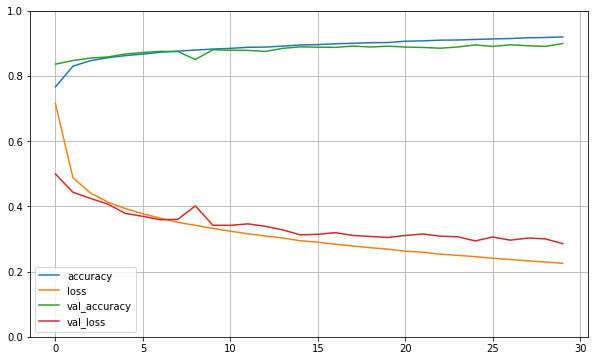

In [155]:
df.plot(figsize=(10, 6))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

The training and validation curves are close which means the model is not overfitting. In addition the loss is decreasing and the accuracy is increasing which means we could keep on training until they converge.

We could improve performance by tuning the number of layers, the number of neurons per layer, the types of activation functions we use for each hidden layer, the number of epochs, the batch size.

In [156]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8498 - loss: 64.5316


[68.0980224609375, 0.8432000279426575]

## Using the Model to Make Predictions

In [157]:
X_new = X_test[-3:]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [158]:
np.array(class_names)[y_pred]

array(['Bag', 'Trouser', 'Sandal'], dtype='<U11')

In [159]:
model.save('model.keras')

# Building a Regression MLP Using the Sequential API

In [160]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [161]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [163]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [164]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

c:\users\ayanle\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model2.compile(loss='mean_squared_error', optimizer='sgd')

In [166]:
history = model2.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val))

Epoch 1/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - loss: 1.5027 - val_loss: 0.7742
Epoch 2/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.5232 - val_loss: 0.4924
Epoch 3/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4694 - val_loss: 0.4764
Epoch 4/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.4421 - val_loss: 0.4672
Epoch 5/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4456 - val_loss: 0.4272
Epoch 6/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.4388 - val_loss: 0.4229
Epoch 7/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.4163 - val_loss: 0.4088
Epoch 8/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3980 - val_loss: 0.4008
Epoch 9/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.4014 - val_loss: 0.4075
Epoch 10/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.4190 - val_loss: 0.4036
Epoch 11/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 0.3799 - val_loss: 0.3962
Epoch 12/20
523/523 ━━━━━━━━━━

In [167]:
mse_test = model2.evaluate(X_test_scaled, y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.3326


In [168]:
X_new = X_test_scaled[:3]
y_pred = model2.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [169]:
y_pred

array([[1.1120763],
       [0.9620697],
       [0.8577667]], dtype=float32)

# Building Complex Models Using the Functional API

One example of a non-sequential neural network is a Wide and Deep neural network. This type of neural network connects part or all of the inputs directly to the output layer which makes it possible to learn deep patterns (through the deep path) and simple patterns through the short path.

In [170]:
input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input], outputs=[output])

1. We created an input object
2. We create the first hidden layer with 30 neurons and relu activation and pass it the input.
3. Then we have a second hidden layer and pass it the output of the first hidden layer.
4. We then create a concatenate() layer to concatenate the input and output of the second hidden layer.
5. We then have an output layer where pass the results of the concatenation.
6. We then have a keras model where we specify which inputs and outputs to use.

From here we can compile the model, train it, evaluate it and make predictions.

What if we want to send some of the training features through the wide path and some through the deep path. In this case one would use multiple inputs. In the following we will send 5 features through the wide path and six features through the deep path.

In [171]:
input_A = keras.layers.Input(shape=[5], name='wide')
input_B = keras.layers.Input(shape=[6], name='deep')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [172]:
model2.compile(loss='mean_squared_error', optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [173]:
X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_val_A, X_val_B = X_val_scaled[:, :5], X_val_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]

From here we can compile the model, train it, evaluate it and make predictions.

In [174]:
history = model2.fit((X_train_A, X_train_B), y_train, epochs=20,
 validation_data=((X_val_A, X_val_B), y_val))
mse_test = model2.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 3.2548 - val_loss: 0.8683
Epoch 2/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.7550 - val_loss: 0.6589
Epoch 3/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 0.6210 - val_loss: 0.6127
Epoch 4/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.5682 - val_loss: 0.5921
Epoch 5/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.5552 - val_loss: 0.5714
Epoch 6/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 0.5237 - val_loss: 0.5551
Epoch 7/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.5245 - val_loss: 0.5519
Epoch 8/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 0.5071 - val_loss: 0.5524
Epoch 9/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.4962 - val_loss: 0.5282
Epoch 10/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.5102 - val_loss: 0.5215
Epoch 11/20
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 0.4958 - val_loss: 0.5155
Epoch 12/20
523/523 ━━━━━━━━━━

In [175]:
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
y_pred = model2.predict((X_new_A, X_new_B))
y_pred, y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(array([[1.4164852 ],
        [0.79777217],
        [1.0377274 ]], dtype=float32),
 array([0.98 , 1.086, 0.768]))

### Multiple Outputs

There are cases where we may have to use multiple outputs. For example if we want to locate and classify the coordinates of the main object in a picture. This is both regression and classification. We can add extra outputs using the following.

In [176]:
output = keras.layers.Dense(1, name='main_output')(concat) # same main output as above
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model2 = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output has its own loss function. Keras will compute the losses and add them up and so we should priotise which model we are more interested in by giving it more weight.

In [177]:
model2.compile(loss=['mse', 'mse'], loss_weights =[0.9, 0.1], optimizer='sgd') # we give more weight to the main output

In [178]:
history = model2.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, validation_data = ([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - aux_output_loss: 0.2880 - loss: 1.2329 - main_output_loss: 0.9449 - val_aux_output_loss: 0.0926 - val_loss: 0.5332 - val_main_output_loss: 0.4353
Epoch 2/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - aux_output_loss: 0.0856 - loss: 0.5217 - main_output_loss: 0.4361 - val_aux_output_loss: 0.0774 - val_loss: 0.5069 - val_main_output_loss: 0.4238
Epoch 3/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - aux_output_loss: 0.0718 - loss: 0.4757 - main_output_loss: 0.4039 - val_aux_output_loss: 0.0779 - val_loss: 0.4876 - val_main_output_loss: 0.4048
Epoch 4/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - aux_output_loss: 0.0691 - loss: 0.4673 - main_output_loss: 0.3982 - val_aux_output_loss: 0.0720 - val_loss: 0.5049 - val_main_output_loss: 0.4270
Epoch 5/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - aux_output_loss: 0.0658 - loss: 0.4511 - main_output_loss: 0.3853 - val_aux_output_loss: 0.0676 - val_loss: 0.4588 - val_main_output_los

In [179]:
total_loss, main_loss, aux_loss = model2.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - aux_output_loss: 0.0554 - loss: 0.3739 - main_output_loss: 0.3185


In [180]:
y_pred_main, y_pred_aux = model2.predict([X_new_A, X_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [181]:
y_pred_main, y_pred_aux

(array([[1.34879  ],
        [0.7728837],
        [1.0779507]], dtype=float32),
 array([[1.3425562],
        [1.1236522],
        [1.232836 ]], dtype=float32))

# Using the Subclassing API to Build Dynamic Models

Both the Sequential API and the Functional API work by declaring which layers we want to use and how these layers should be connected. Although this has many advantages sometimes it's better to use an API which unlike the Sequential and Functional APIs can handle dynamic behaviours.

In [182]:
class WideAndDeepModel(keras.models.Model): 
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate([input_A, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

The first part is a constructor where we build the layers for the model and in the second part we use the layers. The good thing about this API is that now we can use for loops, if statements and many other things.

The downside is since the architecture is hidden within the call() function it cannot save or clone the model and even the summary() method does not work as intended. This API should only be used if the flexibility is really needed.

# Saving & Restoring a Model

In [183]:
model.save('model2.keras') # This saves all the hyperparamters of each layers, optimizers and all the model parameters.

In [184]:
# model = keras.models.load_model('model.h5') # This loads the model

When training lasts hours then it is useful to save checkpoints at regular intervals during training. We can do this using callbacks.

# Using Callbacks

In [185]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model2.keras') # saves checkpoints at regular intervals 
                                                            # by default at the end of each epoch

In [186]:
model2.compile(loss='mse', optimizer='sgd', loss_weights=[0.9, 0.1])

In [187]:
history = model2.fit([X_train_A,X_train_B], [y_train, y_train], epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - aux_output_loss: 0.0551 - loss: 0.3874 - main_output_loss: 0.3323
Epoch 2/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - aux_output_loss: 0.0545 - loss: 0.3872 - main_output_loss: 0.3327
Epoch 3/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - aux_output_loss: 0.0542 - loss: 0.3852 - main_output_loss: 0.3310
Epoch 4/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - aux_output_loss: 0.0521 - loss: 0.3785 - main_output_loss: 0.3264
Epoch 5/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - aux_output_loss: 0.0503 - loss: 0.3664 - main_output_loss: 0.3161
Epoch 6/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - aux_output_loss: 0.0521 - loss: 0.3858 - main_output_loss: 0.3338
Epoch 7/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - aux_output_loss: 0.0495 - loss: 0.3647 - main_output_loss: 0.3152
Epoch 8/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - aux_output_loss: 0.0494 - loss: 0.3687 - main_output_loss: 0.3194
Epoch 9/10
523/523 ━━━━━

In [188]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model2.keras', save_best_only=True) # saves only best model
history = model2.fit([X_train_A, X_train_B], [y_train, y_train], 
                    validation_data = ([X_val_A, X_val_B], [y_val, y_val]), epochs=10, 
                    callbacks=[checkpoint_cb])

Epoch 1/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - aux_output_loss: 0.0458 - loss: 0.3538 - main_output_loss: 0.3080 - val_aux_output_loss: 0.0491 - val_loss: 0.3750 - val_main_output_loss: 0.3232
Epoch 2/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - aux_output_loss: 0.0480 - loss: 0.3648 - main_output_loss: 0.3168 - val_aux_output_loss: 0.0482 - val_loss: 0.3693 - val_main_output_loss: 0.3182
Epoch 3/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - aux_output_loss: 0.0455 - loss: 0.3485 - main_output_loss: 0.3030 - val_aux_output_loss: 0.0500 - val_loss: 0.3702 - val_main_output_loss: 0.3164
Epoch 4/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - aux_output_loss: 0.0471 - loss: 0.3654 - main_output_loss: 0.3183 - val_aux_output_loss: 0.0480 - val_loss: 0.3707 - val_main_output_loss: 0.3199
Epoch 5/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - aux_output_loss: 0.0445 - loss: 0.3431 - main_output_loss: 0.2987 - val_aux_output_loss: 0.0483 - val_loss: 0.3737 - val_main_output_los

We can use callbacks with early stopping to save time and resources. This works by because the callback saves the best model and early stopping interupts training when there is no progress on the validation set for a number of epochs (defined by the patience argument).

In [189]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model2.fit([X_train_A, X_train_B], [y_train, y_train], 
                    validation_data = ([X_val_A, X_val_B], [y_val, y_val]), epochs=10, 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - aux_output_loss: 0.0426 - loss: 0.3441 - main_output_loss: 0.3015 - val_aux_output_loss: 0.0443 - val_loss: 0.3834 - val_main_output_loss: 0.3370
Epoch 2/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - aux_output_loss: 0.0433 - loss: 0.3468 - main_output_loss: 0.3034 - val_aux_output_loss: 0.0440 - val_loss: 0.3874 - val_main_output_loss: 0.3403
Epoch 3/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - aux_output_loss: 0.0406 - loss: 0.3270 - main_output_loss: 0.2864 - val_aux_output_loss: 0.0446 - val_loss: 0.3772 - val_main_output_loss: 0.3276
Epoch 4/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - aux_output_loss: 0.0416 - loss: 0.3390 - main_output_loss: 0.2974 - val_aux_output_loss: 0.0453 - val_loss: 0.3848 - val_main_output_loss: 0.3367
Epoch 5/10
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - aux_output_loss: 0.0432 - loss: 0.3431 - main_output_loss: 0.2999 - val_aux_output_loss: 0.0421 - val_loss: 0.3549 - val_main_output_los

# Fine-Tuning Neural Network Hyperparameters

In order to use gridsearch we need to wrap the keras models in objects that are similar to Scikit-Learn Regressors. First we will create a function that will build and compile a keras model.

In [190]:
from scikeras.wrappers import KerasRegressor

In [191]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.model.Sequential()
    options = {'input_shape': input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu', **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [192]:
keras_reg = KerasRegressor(build_model) # We did not provide hyperparameters, it will use the default ones.

In [193]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [194]:
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}
random_search_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distribs,
    n_iter=10,
    cv=3,
    scoring = 'neg_mean_squared_error')